In [1]:
from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.data_utils import get_files_for_ticker
from hsmm_core.labelling import DataLabellingSimple
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))


In [2]:
import fileutils as fileutils
data_path = '/media/ak/My Passport/Data/FinDataReal'
listDataPath =os.listdir(data_path)

# 
# len(get_files_for_ticker('VOD.L'))
#symbols_listDataPath # this gives a list of symbol/folders that have features inside them!

In [3]:
# /media/ak/DataOnly/FinDataReal
#/media/ak/My Passport2/Data/FinDataReal

In [4]:
fileutils.clean_raw_data_path

'/media/ak/DataOnly/Data/'

In [5]:

cleanRawList =os.listdir(fileutils.clean_raw_data_path)
symbols_rawList =[s for s in cleanRawList if s.endswith('.L') or s.endswith('.I')]
symbols_rawList # this is pure CSV files- each one is a filder -csv file

['EGS.L',
 'CRH.I',
 'BLT.L',
 'CNA.L',
 'PRU.L',
 'RTO.L',
 'BATS.L',
 'ULVR.L',
 'CPI.L',
 'IEER.L',
 'UU.L',
 'RDSa.L',
 'RSA.L',
 'CEY.L',
 'TSCO.L',
 'SDR.L',
 'APF.L',
 'STAN.L',
 'REL.L',
 'GKN.L',
 'DMGOa.L',
 'AZN.L',
 'ECM.L',
 'CCL.L',
 'SGE.L',
 'DGE.L',
 'CPG.L',
 'BARC.L',
 'AV.L',
 'AAL.L',
 'VOD.L',
 'RBS.L']

In [6]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)


labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window': 10,
#     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window': 5,
#     'updown_thrshd_vol_pct': 10.,
#     'trading_hours_filter': trading_hours_filter,
# },
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 10,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.05,
#     'threshold_method': ThresholdMethod.arbitrary},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 25,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0001,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0002,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 2,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.005,
    'threshold_method': ThresholdMethod.arbitrary,}
    ,
{
    'labelling_method': LabellingChoice.ep_in_window,
    'rolling_window': 9,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0008,
    'threshold_method': ThresholdMethod.arbitrary,},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 10,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0018}]



In [7]:
#os.listdir('/media/ak/DataOnly/Data/')

In [8]:

def number_of_dates(symbol_idx):
    symbol_path = os.path.join(nonDirectional, symbols_list[symbol_idx], 'NON_DIRECTIONAL')
    return len(os.listdir(symbol_path))


In [10]:
nonDirectional = os.path.join('/media/ak/My Passport/Data/ProcessedData/labels')
number_of_symbols = len(os.listdir(nonDirectional))
symbols_list = sorted(os.listdir(nonDirectional))


In [13]:
# # length_of_dates = {symdd) for i in range(0,40)}
# length_of_dates.keys()

In [14]:
#print(pd.DataFrame.from_dict([length_of_dates]).T.to_latex())

In [22]:
index =0
nonDirectionalSymbol = os.path.join(nonDirectional, symbols_list[index],'NON_DIRECTIONAL')
print(nonDirectionalSymbol)
listofDates = os.listdir(nonDirectionalSymbol)
sd = listofDates[0].split('.')[0]
ed = listofDates[-1].split('.')[0]
len(os.listdir(nonDirectionalSymbol))
ticker = symbols_list[index]

/media/ak/My Passport/Data/ProcessedData/labels/AAL.L/NON_DIRECTIONAL


In [16]:
print(nonDirectionalSymbol)
print(len(os.listdir(nonDirectionalSymbol)))

/media/ak/My Passport/Data/ProcessedData/labels/AAL.L/NON_DIRECTIONAL
56


In [23]:
def get_files_for_ticker(ticker):
    """
    :return: Return all file names available for ticker, sort by name which is date
    """
    fin_data_dir = '/media/ak/My Passport/Data/ProcessedData/labels/'
    total_path = os.path.join(fin_data_dir, ticker,'NON_DIRECTIONAL')
    # os.path.join(total_path, f)
    files_for_ticker = [f.split('.')[0] for f in os.listdir(total_path)
                        if (os.path.isfile(os.path.join(total_path, f)) and '.csv' in f and 'lock' not in f)]

    files_for_ticker.sort()
    return files_for_ticker

In [24]:
len(get_files_for_ticker('AAL.L'))

56

In [26]:
fin_data_dir = '/media/ak/My Passport/Data/ProcessedData/labels/'
print(fin_data_dir)
total_path = os.path.join(fin_data_dir, ticker,'NON_DIRECTIONAL')
print(total_path)
len(os.listdir(total_path))

/media/ak/My Passport/Data/ProcessedData/labels/
/media/ak/My Passport/Data/ProcessedData/labels/AAL.L/NON_DIRECTIONAL


56

In [27]:
index=0

# fileIDX = 1
# pd.read_csv(os.path.join(nonDirectional,os.listdir(nonDirectional)[1]))


ticker = str(symbols_list[index])

sd = sorted(symboldateslist)[0]
ed = sorted(symboldateslist)[len(symboldateslist)-1]

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
print(len(list(data.keys())))



NameError: name 'symboldateslist' is not defined

### old code ignore! below ### 

In [88]:
alternate_label_values =['label_MovAv__window_25__thres_arbitrary__0.0',
 'label_MovAv__window_15__thres_arbitrary__0.0',
 'label_PrMov__window_2__thres_arbitrary__0.5',
 'label_EndPo__window_9__thres_arbitrary__0.1',
 'label_MovAv__window_10__thres_arbitrary__0.2']
LabelsAlternateNames = ['LabelsAlternateOne',
 'LabelsAlternateTwo',
 'LabelsAlternateThree',
 'LabelsAlternateFour',
 'LabelsAlternateFive']
### 
symboldateslist=get_files_for_ticker(str(ticker))
print(ticker)
sd = sorted(symboldateslist)[0]
ed = sorted(symboldateslist)[len(symboldateslist)-1]

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)
print('Finished Creating Labels')    
for idex , dateIdex in enumerate(list(data.keys())):
    print(idex)
    print('Date:', dateIdex)
    for alternate_label_value_idex, alternate_label_value in enumerate(alternate_label_values):
        print('Current Alternate Label Value: ',LabelsAlternateNames[alternate_label_value_idex])        
        df = data[dateIdex][['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Volume',
       'Duration',str(alternate_label_value)]]
        label_symbol_date_path = os.path.join(fileutils.data_path,LabelsAlternateNames[alternate_label_value_idex], ticker, dateIdex)
        
        filename = os.path.join(label_symbol_date_path,dateIdex+'.csv')
        
        if os.path.exists(label_symbol_date_path) ==True:
            print('Saving the dataframce CSV')
            ff('path_exists')
            df.to_csv(filename)
        else:
            os.mkdir(label_symbol_date_path)
            print('Produced this directory: ', label_symbol_date_path)
            df.to_csv(filename)
           
            

AAL.L
Finished Creating Labels
0
Date: 20170116
Current Alternate Label Value:  LabelsAlternateOne


FileNotFoundError: [Errno 2] No such file or directory: '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/AAL.L/20170116'

In [10]:
fileutils.data_path

'/media/ak/My Passport/Data/FinDataReal/'

In [61]:
data

{'20170116':       Unnamed: 0       TradedTime  TradedPrice  ReturnTradedPrice   Volume  \
 0              0  08:00:14.137937     0.135500           0.000000  62439.0   
 1              1  08:00:14.140071     0.135500           0.000000   1300.0   
 2              2  08:00:14.187955     0.135550           0.000369    938.0   
 3              3  08:00:14.258144     0.135600           0.000369     62.0   
 4              4  08:00:14.298304     0.135600           0.000000   1138.0   
 ...          ...              ...          ...                ...      ...   
 5401        5401  16:29:45.617187     0.135850           0.000000    166.0   
 5402        5402  16:29:46.136621     0.135750          -0.000736     18.0   
 5403        5403  16:29:50.027410     0.135850           0.000736    102.0   
 5404        5404  16:29:53.006476     0.135800          -0.000368      7.0   
 5405        5405  16:29:57.106960     0.135803           0.000025   1500.0   
 
       Duration  label_PrMov__window_5

In [ ]:
# import collections
# passport = '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateTwo/'
# locations= collections.OrderedDict()
# for ticker in listofLabelsSymbols:
#     try:
#         symboldateslist=get_files_for_ticker(str(ticker))
#         print(ticker)
#         sd = symboldateslist[0]
#         ed = symboldateslist[-1]

#         trading_hours_filter = TradingHours.only_mkt_hours

#         data_loader = DataLoader(trading_hours_filter)

#         data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
#         for label_init in labelling_method_params:
#             labeller = DataLabellingSimple(label_init)
#             the_label = labeller.get_label_name()
#             labeller.label_training_data(data)           
            
#         print ("ok")
#     except Exception:
#         continue
    

In [ ]:
# labeller = DataLabellingSimple(
#                     # Style of labelling method - Here we compare rolling 
#                     # inervals end points in absolute terms 
#                     labelling_method=LabellingChoice.price_move_in_window, 
#                     # Window for labelling method= Number of look ahead trades that control up /down move
#                     rolling_window=5,
#                     # Calculate threshold by means of moving average historical vol
#                     thrshd_method=.historical_vol_ma,
#                     # Use the last 5 days for the above average. 
#                     thrshd_vol_window=5,
#                     # Pct of historical vol to use for threshold, i.e. 0.1 * historical vol
#                     updown_thrshd_vol_pct=10.)ThresholdMethod

In [ ]:
# labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window_': np.int(100),
# #     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window_': 0.1,
#     'updown_thrshd_vol_pct_': 10.,
#     'trading_hours_filter_': trading_hours_filter,
# }]

In [ ]:
DataLabellingSimple?

In [ ]:
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)

print ("ok")

In [ ]:
# import pickle
# passport = '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/'
# filename = "".join((passport,ticker.split(".")[0],'_AlternateLabels.pickle'))
# with open(filename, 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
# filename

In [62]:
df = data[list(data.keys())[3]]
differentLabelTypes=df.filter(like='label', axis=1).columns.values
differentLabelTypes

array(['label_PrMov__window_5__thres_arbitrary__0.1',
       'label_MovAv__window_25__thres_arbitrary__0.0',
       'label_MovAv__window_15__thres_arbitrary__0.0',
       'label_PrMov__window_2__thres_arbitrary__0.5',
       'label_EndPo__window_9__thres_arbitrary__0.1',
       'label_MovAv__window_10__thres_arbitrary__0.2'], dtype=object)

In [64]:
for key in list(data.keys()):
    symboldateslist=get_files_for_ticker(str(ticker))
    print(key)
    df = data[key]
    differentLabelTypes=df.filter(like='label', axis=1).columns.values
    print(str(differentLabelTypes[0]))
    print(df[differentLabelTypes[0]].value_counts())
    print('----------------------***-----------------')
    print(str(differentLabelTypes[1]))
    print(df[differentLabelTypes[1]].value_counts())    
    print('----------------------')

20170116
label_PrMov__window_5__thres_arbitrary__0.1
0.0    4874
1.0     528
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    2365
 1.0    2300
 0.0     717
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------
20170117
label_PrMov__window_5__thres_arbitrary__0.1
0.0    5295
1.0     466
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    2648
 1.0    2442
 0.0     651
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------
20170118
label_PrMov__window_5__thres_arbitrary__0.1
0.0    5822
1.0     375
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
 1.0    2831
-1.0    2486
 0.0     860
Name: label_MovAv__w

20170801
label_PrMov__window_5__thres_arbitrary__0.1
0.0    4238
1.0      93
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    2026
 1.0    1595
 0.0     690
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------
20170802
label_PrMov__window_5__thres_arbitrary__0.1
0.0    4409
1.0      85
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    1926
 1.0    1802
 0.0     746
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------
20170803
label_PrMov__window_5__thres_arbitrary__0.1
0.0    4919
1.0     123
Name: label_PrMov__window_5__thres_arbitrary__0.1, dtype: int64
----------------------***-----------------
label_MovAv__window_25__thres_arbitrary__0.0
 1.0    2368
-1.0    2050
 0.0     604
Name: label_MovAv__w

In [ ]:
# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)

In [ ]:
# for dataKey in list(data.keys()):
    

In [ ]:
#df[differentLabelTypes[0]].value_counts()#[1]/df[differentLabelTypes[1]].value_counts()[0]

In [65]:
keys=list(data.keys())
from collections import defaultdict
labelsDict = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    print(differentLabelTypes)
    print(differentLabelTypes.shape[0])
    for i in range(differentLabelTypes.shape[0]):
        print(i)
        try:
            print(key)
            labelsDict[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[1]/df[differentLabelTypes[i]].value_counts()[0]
        except:
            print('continuing')
            continue
    


['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
6
0
20170116
1
20170116
2
20170116
3
20170116
continuing
4
20170116
5
20170116
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
6
0
20170117
1
20170117
2
20170117
3
20170117
4
20170117
5
20170117
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0

3
20170811
4
20170811
5
20170811
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
6
0
20170814
1
20170814
2
20170814
3
20170814
4
20170814
5
20170814
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
6
0
20170815
1
20170815
2
20170815
3
20170815
4
20170815
5
20170815
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_

In [66]:
labelsDict.keys()

dict_keys(['label_PrMov__window_5__thres_arbitrary__0.1', 'label_MovAv__window_25__thres_arbitrary__0.0', 'label_MovAv__window_15__thres_arbitrary__0.0', 'label_EndPo__window_9__thres_arbitrary__0.1', 'label_MovAv__window_10__thres_arbitrary__0.2', 'label_PrMov__window_2__thres_arbitrary__0.5'])

['label_PrMov__window_2__thres_arbitrary__0.5']


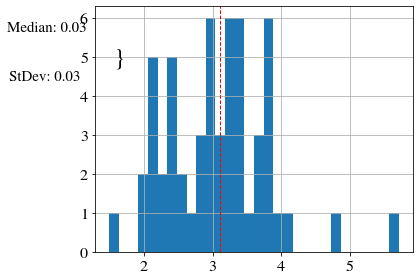

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
balanceKeys = labelsDict.keys()

df.from_dict(labelsDict)[differentLabelTypes[1]].hist(bins=30)
plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
x= df.from_dict(labelsDict)[differentLabelTypes[0]]
print([differentLabelTypes[3]])
min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*0.3, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
plt.annotate(r"$\}$",fontsize=24,
            xy=(0.27, 0.77), xycoords='figure fraction'
            )
plt.show()

# df.from_dict(labelsDict)[differentLabelTypes[2]].hist(bins=30)
# plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[2]].median(), color='r', linestyle='dashed', linewidth=1)
# x= df.from_dict(labelsDict)[differentLabelTypes[2]]
# print([differentLabelTypes[4]])
# min_ylim, max_ylim = plt.ylim()
# plt.text(x.mean()*1.4, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
# plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()))
# plt.show()

In [68]:
tests = df.from_dict(labelsDict)
#g = sns.FacetGrid(tests)
#sns.load_dataset("tips")
testsDF = tests.reset_index().rename(columns={"index": "Date"})
testsDF.head(5)

,Date,label_PrMov__window_5__thres_arbitrary__0.1,label_MovAv__window_25__thres_arbitrary__0.0,label_MovAv__window_15__thres_arbitrary__0.0,label_EndPo__window_9__thres_arbitrary__0.1,label_MovAv__window_10__thres_arbitrary__0.2,label_PrMov__window_2__thres_arbitrary__0.5
0,20170116,0.108330,3.207810,1.143120,0.144518,0.004111,NaN
1,20170117,0.088008,3.751152,1.104155,0.101877,0.004728,0.000347
2,20170118,0.064411,3.291860,1.173665,0.106507,0.001136,0.000969
3,20170119,0.054493,3.261218,1.031726,0.087581,0.001962,0.000780
4,20170120,0.040981,2.466729,0.845248,0.058834,0.001245,0.000310


In [69]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=False, bins=20)
    _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)))
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(x.std()*0.5, max_ylim*0.1, 'StDev: {:.2f}'.format(x.std()))
    plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()

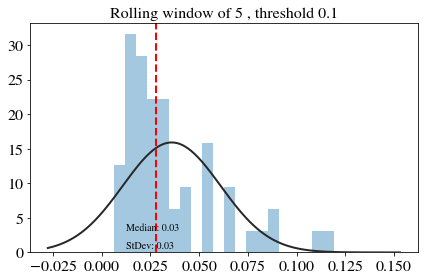

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':
/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


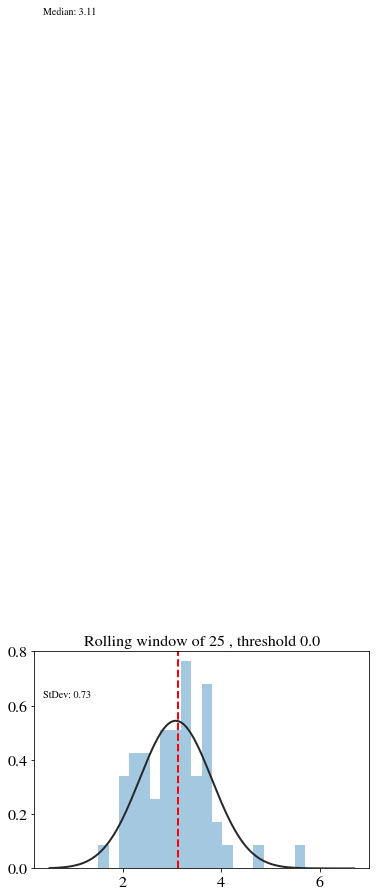

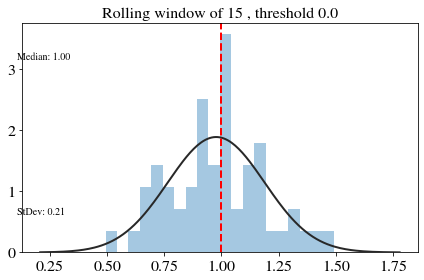

In [70]:
for i in range(0,3):
    x= df.from_dict(labelsDict)[differentLabelTypes[i]]
    price_based_histogram_labels(x, labelText= differentLabelTypes[i])

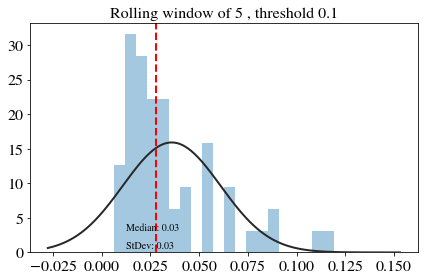

In [71]:
i=0
x= df.from_dict(labelsDict)[differentLabelTypes[i]]
price_based_histogram_labels(x, labelText= differentLabelTypes[i])

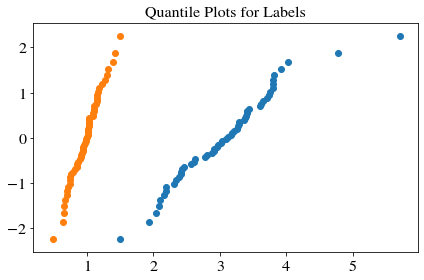

In [72]:
from scipy import stats
x2= df.from_dict(labelsDict)[differentLabelTypes[2]]
x1= df.from_dict(labelsDict)[differentLabelTypes[1]]
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)
    
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

quantile_plot(x1)
quantile_plot(x2)
_=plt.title('Quantile Plots for Labels')
#todo add legends and a 45% degree line

In [73]:
labels =testsDF.filter(like='label', axis=1).columns.values


In [74]:
dfs = []
for label, _ in enumerate(labels):
    df1 = testsDF[['Date', labels[label]]]
    df1Clean = pd.DataFrame()

    df1Clean['Date'] = df1['Date']
    df1Clean['LabelValue'] = df1[labels[label]]
    df1Clean['LabelType'] = 'Label '+str(label)
    dfs.append(df1Clean)

In [75]:
dfsConcat = pd.concat(dfs,axis =0)
dfsConcat.columns.values

array(['Date', 'LabelValue', 'LabelType'], dtype=object)

In [76]:
df1 = testsDF[['Date', labels[0]]]
df1Clean = pd.DataFrame()

df1Clean['Date'] = df1['Date']
df1Clean['LabelValue'] = df1[labels[0]]
df1Clean['LabelType'] = 'Label1'

df2 = testsDF[['Date', labels[1]]]
df2Clean = pd.DataFrame()

df2Clean['Date'] = df1['Date']
df2Clean['LabelValue'] = df2[labels[1]]
df2Clean['LabelType'] = 'Label2'

df3 = testsDF[['Date', labels[2]]]
df3Clean = pd.DataFrame()

df3Clean['Date'] = df3['Date']
df3Clean['LabelValue'] = df3[labels[2]]
df3Clean['LabelType'] = 'Label3'

df4 = testsDF[['Date', labels[4]]]
df4Clean = pd.DataFrame()

df4Clean['Date'] = df4['Date']
df4Clean['LabelValue'] = df4[labels[4]]
df4Clean['LabelType'] = 'Label4'

df= pd.concat([df1Clean, df2Clean, df3Clean], axis=0)
#df2= pd.concat([df3Clean, df4Clean], axis=0)


In [77]:
df

,Date,LabelValue,LabelType
0,20170116,0.108330,Label1
1,20170117,0.088008,Label1
2,20170118,0.064411,Label1
3,20170119,0.054493,Label1
4,20170120,0.040981,Label1
...,...,...,...
51,20170824,0.710744,Label3
52,20170825,0.737245,Label3
53,20170829,0.794725,Label3
54,20170830,0.925121,Label3


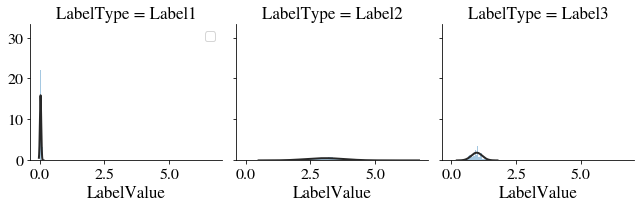

In [78]:

g = sns.FacetGrid(df, col="LabelType",legend_out=False)
_=g.map(sns.distplot, "LabelValue", bins=20,fit=norm, kde=False)
g.add_legend()

In [ ]:
# differentLabelTypes =test_df.filter(like='label', axis=1).columns.values

# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


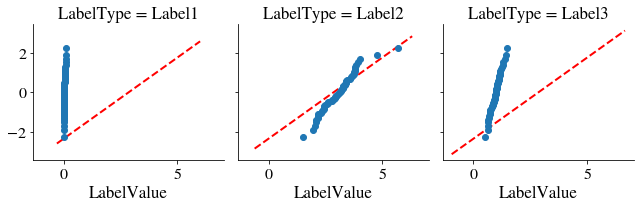

In [79]:
g = sns.FacetGrid(df, col="LabelType",legend_out=False)
g.map(quantile_plot, "LabelValue")
plt.legend([],[], frameon=False)
# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
# 
# ax.set_prop_cycle(color=['red', 'green', 'blue'])
axes = g.fig.axes

for ax in axes:
    x = np.linspace(*ax.get_xlim())#*1.09
    y = np.linspace(*ax.get_ylim())#*1.09
    ax.plot(x, y,c="red", ls="--",zorder=0)
    ax. legend(loc='upper left', frameon=False) 
    

plt.show()

# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)

In [7]:
import pandas as pd
import os 
import pickle as pickle
test= '/media/ak/My Passport/Data/FinDataReal/JointLocationsAlternateDataClean/ECM.L/'
files = os.listdir(test)

In [11]:
file_path = os.path.join(test, files[2])

In [12]:
file_path

'/media/ak/My Passport/Data/FinDataReal/JointLocationsAlternateDataClean/ECM.L/ECM.L_LabelsAlternateOne_ProcessedData.pkl'

In [8]:
def load_pickled_in_filename(file):
    # load a simple pickled file and return it. its a bit different to the method used for the dictionary as this
    # is pure Python 3.x
    pickle_in = open(file, 'rb')
    return pickle.load(pickle_in)